In [16]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

## Compute Efficiency Data

In [ ]:
# Prepare paths
projectPath = os.path.abspath(os.path.join(os.getcwd(), '..'))
modes_dir = os.path.join(projectPath, 'sumoenv/scenarios/normal')

records = []
# Traverse each mode (sumo, social_groups, multi_agent)
for mode in os.listdir(modes_dir):
    mode_path = os.path.join(modes_dir, mode)
    if not os.path.isdir(mode_path):
        continue
    # Traverse each folder inside the mode
    for date in os.listdir(mode_path):
        date_path = os.path.join(mode_path, date)
        if not os.path.isdir(date_path):
            continue
        summary_path = os.path.join(date_path, 'simulation_summary.csv')
        if os.path.exists(summary_path):
            df = pd.read_csv(summary_path)
            if not df.empty:
                first_row = df.iloc[0]
                elapsed_sec = first_row['total_elapsed_seconds']
                sumo_sec = first_row['sumo_time']
                agents_sec = first_row['agents_time'] if mode in ['multi_agent', 'social_groups'] else 0
                records.append({
                    'mode': mode,
                    'date': date,
                    'elapsed_seconds': elapsed_sec,
                    'elapsed_minutes': round(elapsed_sec / 60, 2),
                    'sumo_time': sumo_sec,
                    'sumo_minutes': round(sumo_sec / 60, 2),
                    'agents_time': agents_sec,
                    'agents_minutes': round(agents_sec / 60, 2)
                })
# Save results to CSV
summary_df = pd.DataFrame(records)
output_file = os.path.join(projectPath, 'experiments/efficiency_results_normal.csv')
summary_df = summary_df.sort_values(by=['mode', 'date'])
summary_df.to_csv(output_file, index=False)

print(f"Efficiency summary saved to: {output_file}")


Efficiency summary saved to: /Users/beyzaeken/Desktop/sfdigitalmirror/experiments/efficiency_results_normal_1.csv


## Plot Efficiency Data

In [18]:
# Prepare paths
projectPath = os.path.abspath(os.path.join(os.getcwd(), '..'))
modes_dir = os.path.join(projectPath, 'sumoenv/scenarios/normal')

time_sumo_1h_d = []
time_sumo_3h_d = []
time_ma_1h_d = []
time_ma_3h_d = []
time_ma_6h_d = []
time_ma_12h_d = []
time_sg_1h_d = []
time_sg_3h_d = []
time_sg_6h_d = []
time_sg_12h_d = []
time_sumo_1h_n = []
time_sumo_3h_n = []
time_ma_1h_n = []
time_ma_3h_n = []
time_ma_6h_n = []
time_ma_12h_n = []
time_sg_1h_n = []
time_sg_3h_n = []
time_sg_6h_n = []
time_sg_12h_n = []

# Traverse each mode (sumo, social_groups, multi_agent)
for mode in os.listdir(modes_dir):
    mode_path = os.path.join(modes_dir, mode)
    if not os.path.isdir(mode_path):
        continue
    # Traverse each folder inside the mode
    for date in os.listdir(mode_path):
        date_path = os.path.join(mode_path, date)
        if not os.path.isdir(date_path):
            continue
        summary_path = os.path.join(date_path, 'simulation_summary.csv')
        if os.path.exists(summary_path):
            df = pd.read_csv(summary_path)
            if not df.empty:
                # Compute duration from date string
                start_str, end_str = date.split('_')
                fmt = "%y%m%d%H"
                start_dt = datetime.strptime(start_str, fmt)
                end_dt = datetime.strptime(end_str, fmt)
                diff = end_dt - start_dt
                hour_diff = diff.total_seconds() / 3600
                # Compute elapsed time
                first_row = df.iloc[0]
                elapsed_sec = first_row['total_elapsed_seconds']
                if mode == 'sumo':
                    if start_dt.hour == 8:
                        if hour_diff == 1:
                            time_sumo_1h_d.append(elapsed_sec)
                        elif hour_diff == 3:
                            time_sumo_3h_d.append(elapsed_sec)
                    elif start_dt.hour == 20:
                        if hour_diff == 1:
                            time_sumo_1h_n.append(elapsed_sec)
                        elif hour_diff == 3:
                            time_sumo_3h_n.append(elapsed_sec)
                elif mode == 'multi_agent':
                    if start_dt.hour == 8:
                        if hour_diff == 1:
                            time_ma_1h_d.append(elapsed_sec)
                        elif hour_diff == 3:
                            time_ma_3h_d.append(elapsed_sec)
                        elif hour_diff == 6:
                            time_ma_6h_d.append(elapsed_sec)
                        elif hour_diff == 12:
                            time_ma_12h_d.append(elapsed_sec)
                    elif start_dt.hour == 20:
                        if hour_diff == 1:
                            time_ma_1h_n.append(elapsed_sec)
                        elif hour_diff == 3:
                            time_ma_3h_n.append(elapsed_sec)
                        elif hour_diff == 6:
                            time_ma_6h_n.append(elapsed_sec)
                        elif hour_diff == 12:
                            time_ma_12h_n.append(elapsed_sec)
                elif mode == 'social_groups':
                    if start_dt.hour == 8:
                        if hour_diff == 1:
                            time_sg_1h_d.append(elapsed_sec)
                        elif hour_diff == 3:
                            time_sg_3h_d.append(elapsed_sec)
                        elif hour_diff == 6:
                            time_sg_6h_d.append(elapsed_sec)
                        elif hour_diff == 12:
                            time_sg_12h_d.append(elapsed_sec)
                    elif start_dt.hour == 20:
                        if hour_diff == 1:
                            time_sg_1h_n.append(elapsed_sec)
                        elif hour_diff == 3:
                            time_sg_3h_n.append(elapsed_sec)
                        elif hour_diff == 6:
                            time_sg_6h_n.append(elapsed_sec)
                        elif hour_diff == 12:
                            time_sg_12h_n.append(elapsed_sec)

In [19]:
# Compute averages for each time period
def compute_avg(data):
    return sum(data) / len(data) if data else 0

time_sumo_1h_avg_d = compute_avg(time_sumo_1h_d)
time_sumo_3h_avg_d = compute_avg(time_sumo_3h_d)
time_ma_1h_avg_d = compute_avg(time_ma_1h_d)
time_ma_3h_avg_d = compute_avg(time_ma_3h_d)
time_ma_6h_avg_d = compute_avg(time_ma_6h_d)
time_ma_12h_avg_d = compute_avg(time_ma_12h_d)
time_sg_1h_avg_d = compute_avg(time_sg_1h_d)
time_sg_3h_avg_d = compute_avg(time_sg_3h_d)
time_sg_6h_avg_d = compute_avg(time_sg_6h_d)
time_sg_12h_avg_d = compute_avg(time_sg_12h_d)
time_sumo_1h_avg_n = compute_avg(time_sumo_1h_n)
time_sumo_3h_avg_n = compute_avg(time_sumo_3h_n)
time_ma_1h_avg_n = compute_avg(time_ma_1h_n)
time_ma_3h_avg_n = compute_avg(time_ma_3h_n)
time_ma_6h_avg_n = compute_avg(time_ma_6h_n)
time_ma_12h_avg_n = compute_avg(time_ma_12h_n)
time_sg_1h_avg_n = compute_avg(time_sg_1h_n)
time_sg_3h_avg_n = compute_avg(time_sg_3h_n)
time_sg_6h_avg_n = compute_avg(time_sg_6h_n)
time_sg_12h_avg_n = compute_avg(time_sg_12h_n)

sumo_avg_d = [time_sumo_1h_avg_d, time_sumo_3h_avg_d, np.nan, np.nan]
ma_avg_d = [time_ma_1h_avg_d, time_ma_3h_avg_d, time_ma_6h_avg_d, time_ma_12h_avg_d]
sg_avg_d = [time_sg_1h_avg_d, time_sg_3h_avg_d, time_sg_6h_avg_d, time_sg_12h_avg_d]
sumo_avg_n = [time_sumo_1h_avg_n, time_sumo_3h_avg_n, np.nan, np.nan]
ma_avg_n = [time_ma_1h_avg_n, time_ma_3h_avg_n, time_ma_6h_avg_n, time_ma_12h_avg_n]
sg_avg_n = [time_sg_1h_avg_n, time_sg_3h_avg_n, time_sg_6h_avg_n, time_sg_12h_avg_n]

# Estimate SUMO day and night for 6 and 12 hours using power law fitting
x_hours_known = np.array([1, 3])
y_sumo_day_known = np.array([time_sumo_1h_avg_d, time_sumo_3h_avg_d])
y_sumo_night_known = np.array([time_sumo_1h_avg_n, time_sumo_3h_avg_n])

def power_law(x, a, b):
    return a * x**b

# Fit SUMO day
popt_day, _ = curve_fit(power_law, x_hours_known, y_sumo_day_known)
estimated_day_6h = power_law(6, *popt_day)
estimated_day_12h = power_law(12, *popt_day)

# Fit SUMO night
popt_night, _ = curve_fit(power_law, x_hours_known, y_sumo_night_known)
estimated_night_6h = power_law(6, *popt_night)
estimated_night_12h = power_law(12, *popt_night)

# Update sumo_avg arrays
sumo_avg_d = [time_sumo_1h_avg_d, time_sumo_3h_avg_d, estimated_day_6h, estimated_day_12h]
sumo_avg_n = [time_sumo_1h_avg_n, time_sumo_3h_avg_n, estimated_night_6h, estimated_night_12h]

/var/folders/03/ywz8jzld3gs1b0zsd9kydy940000gq/T/ipykernel_25878/2790080018.py:42: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_day, _ = curve_fit(power_law, x_hours_known, y_sumo_day_known)
/var/folders/03/ywz8jzld3gs1b0zsd9kydy940000gq/T/ipykernel_25878/2790080018.py:47: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_night, _ = curve_fit(power_law, x_hours_known, y_sumo_night_known)


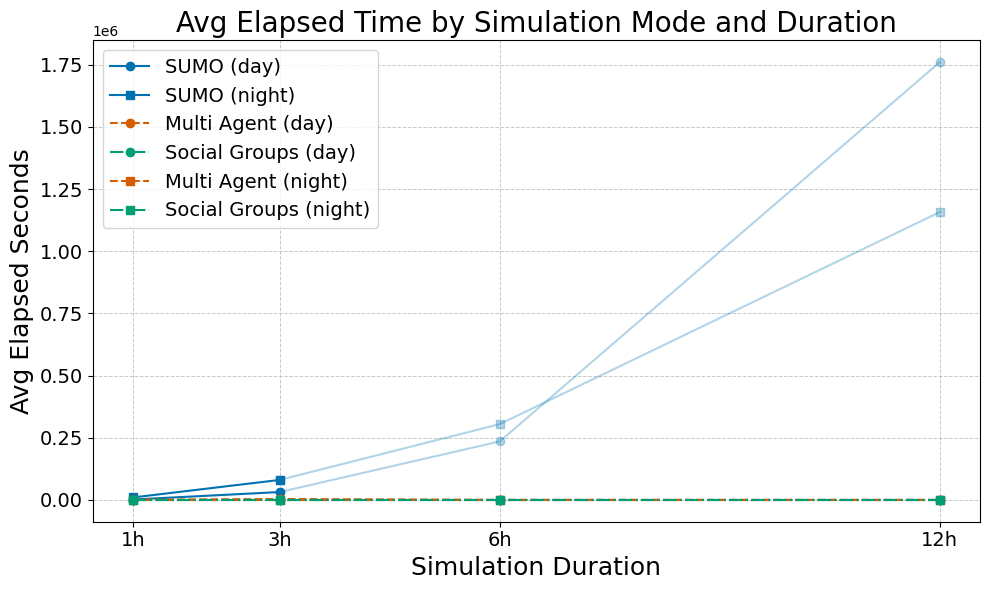

In [20]:
# Colors and styles
colors= ['#0072B2', '#D55E00', '#009E73']
linestyles = ['-', '--', '-.']

x_hours = np.array([1, 3, 6, 12])
x_labels = ['1h', '3h', '6h', '12h']

plt.figure(figsize=(10, 6))

# Plot SUMO
plt.plot(x_hours[:2], sumo_avg_d[:2], marker='o', color=colors[0], label='SUMO (day)')
plt.plot(x_hours[1:], sumo_avg_d[1:], marker='o', color=colors[0], alpha = 0.3)
plt.plot(x_hours[:2], sumo_avg_n[:2], marker='s', color=colors[0], linestyle='-', label='SUMO (night)')
plt.plot(x_hours[1:], sumo_avg_n[1:], marker='s', color=colors[0], alpha = 0.3)

# Plot other modes
plt.plot(x_hours, ma_avg_d, marker='o', label='Multi Agent (day)', color=colors[1], linestyle=linestyles[1])
plt.plot(x_hours, sg_avg_d, marker='o', label='Social Groups (day)', color=colors[2], linestyle=linestyles[2])
plt.plot(x_hours, ma_avg_n, marker='s', label='Multi Agent (night)', color=colors[1], linestyle=linestyles[1])
plt.plot(x_hours, sg_avg_n, marker='s', label='Social Groups (night)', color=colors[2], linestyle=linestyles[2])

# Set log scale and formatting
#plt.yscale('log')
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0f}'.format(y) if y > 0 else '0'))

# Label and style
plt.xticks(x_hours, x_labels, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Simulation Duration', fontsize=18)
plt.ylabel('Avg Elapsed Seconds', fontsize=18)
plt.title('Avg Elapsed Time by Simulation Mode and Duration', fontsize=20)
plt.legend(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.savefig("efficiency.png", dpi=300, bbox_inches='tight')
plt.show()